# Advanced Business Analytics Capstone

***

### Markdown Guides

> This is a blockquote.

Some of these words *are emphasized*.

Use two asterisks for **strong emphasis**.

*   Another item in the list.

This is an [example link](http://example.com/).

$x = x + y$

[text to appear as link](#linkhandle)

Images inline
![image](https://imgbbb.com/images/2019/12/18/Screenshot-2019-12-18-at-12.55.36-PM.png)

## Project Description

Lending Club is a peer-to-peer lending company, headquartered in San Francisco, California. The company provides the world's largest peer-to-peer lending platform, where borrowers can obtain unsecured personal loans between $1,000 and $40,000, and investors can purchase notes backed by payments made on loans. Investors can search and browse the loan listings on the Lending Club website and select loans that they want to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose. Investors make money from interest. Lending Club makes money by charging borrowers an origination fee and investors a service fee. Lending Club went public in the year 2014 (stock symbol LC). As of February 2016, it has a market capitalization of about 2.5 billion dollars.

An investment company is planning to invest $10 million with Lending Club. You are hired as a consultant to help the company choose the loans they invest in. The file data.xlxs contains loan data downloaded from https://www.lendingclub.com/info/download-data.action. Lending Club provides detailed loan data since 2007. In order to limit the scope of the project, the data file contains the data from the year 2015 and only 36-month loans for credit card debt. Your client asked you to analyze these loans as they consider them the primary investment target. There are 7151 rows of 16 variables in the dataset. Here is a brief explanation of the different columns based on the data dictionary provided by Lending Club.

## Data Dictionary

![image](DAB-Capstone-Table-1.png)

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random

import sklearn
import statsmodels.api as sm

import datetime
from datetime import datetime, timedelta


import scipy.stats

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_validate, KFold, RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
#from sklearn.pipeline import Pipeline
#from sklearn.feature_selection import RFE, RFECV, SelectKBest, f_classif, f_regression, chi2
#from sklearn.inspection import permutation_importance

from sklearn.tree import export_graphviz, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

# Use Feature-Engine library

#import feature_engine.missing_data_imputers as mdi
from feature_engine.outliers import Winsorizer
#from feature_engine import categorical_encoders as ce



#from pycaret.clustering import *
#from pycaret.regression import *

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)


random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Module 1 - Understand the data and prepare your data for analysis

In [2]:
df = pd.read_csv("data-capstone-project.csv")

In [3]:
df

,id,member_id,term,purpose,loan_status,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,revol_bal,revol_util,total_acc,acc_open_past_24mths,total_pymnt
0,62286683,66483442,36 months,credit_card,Fully Paid,24000,7.89,750.86,MORTGAGE,237500.00,Source Verified,28279,36.90,25,5,24948.45
1,46314315,49422035,36 months,credit_card,Fully Paid,8000,6.68,245.85,RENT,41000.00,Not Verified,24377,51.00,29,2,8351.63
2,51317198,54726945,36 months,credit_card,Fully Paid,12175,9.17,388.13,MORTGAGE,100000.00,Not Verified,21329,64.60,17,3,13205.91
3,42984750,45981489,36 months,credit_card,Charged Off,6400,6.92,197.38,RENT,41900.00,Source Verified,14936,73.20,15,1,3550.38
4,42181434,45138158,36 months,credit_card,Fully Paid,12600,6.68,387.22,OWN,73800.00,Not Verified,9904,20.70,25,4,13125.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7146,38332310,41116076,36 months,credit_card,Fully Paid,5000,17.14,178.62,MORTGAGE,32500.00,Verified,9600,55.80,37,9,5616.01
7147,45374391,48482120,36 months,credit_card,Fully Paid,5000,8.18,157.10,OWN,60000.00,Not Verified,17667,67.90,21,2,5334.51
7148,60771081,64812826,36 months,credit_card,Fully Paid,13800,8.18,433.59,MORTGAGE,94000.00,Source Verified,16419,55.80,31,9,14187.91
7149,40420518,43285242,36 months,credit_card,Fully Paid,19175,17.14,684.98,MORTGAGE,80000.00,Not Verified,46559,71.10,24,6,22197.23


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7151 entries, 0 to 7150
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    7151 non-null   int64  
 1   member_id             7151 non-null   int64  
 2   term                  7151 non-null   object 
 3   purpose               7151 non-null   object 
 4   loan_status           7151 non-null   object 
 5   loan_amnt             7151 non-null   int64  
 6   int_rate              7151 non-null   float64
 7   installment           7151 non-null   float64
 8   home_ownership        7151 non-null   object 
 9   annual_inc            7151 non-null   float64
 10  verification_status   7151 non-null   object 
 11  revol_bal             7151 non-null   int64  
 12  revol_util            7148 non-null   float64
 13  total_acc             7151 non-null   int64  
 14  acc_open_past_24mths  7151 non-null   int64  
 15  total_pymnt          

In [5]:
df.describe(include='all')

,id,member_id,term,purpose,loan_status,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,revol_bal,revol_util,total_acc,acc_open_past_24mths,total_pymnt
count,7151.00,7151.00,7151,7151,7151,7151.00,7151.00,7151.00,7151,7151.00,7151,7151.00,7148.00,7151.00,7151.00,7151.00
unique,NaN,NaN,1,1,2,NaN,NaN,NaN,3,NaN,3,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,36 months,credit_card,Fully Paid,NaN,NaN,NaN,MORTGAGE,NaN,Source Verified,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,7151,7151,5943,NaN,NaN,NaN,3243,NaN,2939,NaN,NaN,NaN,NaN,NaN
mean,51061858.63,54534399.97,NaN,NaN,NaN,13579.37,10.43,440.72,NaN,76244.96,NaN,18807.83,53.77,25.88,4.89,12830.46
std,9419570.38,10032114.79,NaN,NaN,NaN,8148.56,3.32,266.74,NaN,54568.59,NaN,26051.75,22.73,12.49,3.24,8946.45
min,580084.00,745743.00,NaN,NaN,NaN,1000.00,5.32,30.85,NaN,8000.00,NaN,0.00,0.00,4.00,0.00,0.00
25%,42293901.50,45255778.00,NaN,NaN,NaN,7500.00,7.89,243.13,NaN,45000.00,NaN,7328.50,36.90,17.00,3.00,6162.90
50%,50446212.00,53816115.00,NaN,NaN,NaN,11425.00,9.99,367.19,NaN,65000.00,NaN,12781.00,53.50,24.00,4.00,10605.06
75%,59231418.50,63117821.00,NaN,NaN,NaN,18600.00,12.69,609.36,NaN,93000.00,NaN,22059.00,70.90,33.00,7.00,17410.04


In [6]:
df.shape

(7151, 16)

In [7]:
df.columns

Index(['id', 'member_id', 'term', 'purpose', 'loan_status', 'loan_amnt', 'int_rate', 'installment', 'home_ownership', 'annual_inc', 'verification_status', 'revol_bal', 'revol_util', 'total_acc', 'acc_open_past_24mths', 'total_pymnt'], dtype='object')

## Data Preprocessing

### Drop unwanted features

In [8]:
df.columns

Index(['id', 'member_id', 'term', 'purpose', 'loan_status', 'loan_amnt', 'int_rate', 'installment', 'home_ownership', 'annual_inc', 'verification_status', 'revol_bal', 'revol_util', 'total_acc', 'acc_open_past_24mths', 'total_pymnt'], dtype='object')

In [9]:
df.drop(['id', 'member_id', 'term', 'purpose','home_ownership','verification_status'],axis=1,inplace=True)

In [10]:
df.head()

,loan_status,loan_amnt,int_rate,installment,annual_inc,revol_bal,revol_util,total_acc,acc_open_past_24mths,total_pymnt
0,Fully Paid,24000,7.89,750.86,237500.00,28279,36.90,25,5,24948.45
1,Fully Paid,8000,6.68,245.85,41000.00,24377,51.00,29,2,8351.63
2,Fully Paid,12175,9.17,388.13,100000.00,21329,64.60,17,3,13205.91
3,Charged Off,6400,6.92,197.38,41900.00,14936,73.20,15,1,3550.38
4,Fully Paid,12600,6.68,387.22,73800.00,9904,20.70,25,4,13125.77


### Treat Missing Values

In [11]:
df.isnull().sum()

loan_status             0
loan_amnt               0
int_rate                0
installment             0
annual_inc              0
revol_bal               0
revol_util              3
total_acc               0
acc_open_past_24mths    0
total_pymnt             0
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

loan_status             0
loan_amnt               0
int_rate                0
installment             0
annual_inc              0
revol_bal               0
revol_util              0
total_acc               0
acc_open_past_24mths    0
total_pymnt             0
dtype: int64

In [14]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7148 entries, 0 to 7150
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_status           7148 non-null   object 
 1   loan_amnt             7148 non-null   int64  
 2   int_rate              7148 non-null   float64
 3   installment           7148 non-null   float64
 4   annual_inc            7148 non-null   float64
 5   revol_bal             7148 non-null   int64  
 6   revol_util            7148 non-null   float64
 7   total_acc             7148 non-null   int64  
 8   acc_open_past_24mths  7148 non-null   int64  
 9   total_pymnt           7148 non-null   float64
dtypes: float64(5), int64(4), object(1)
memory usage: 614.3+ KB


In [15]:
df.describe(include='all')

,loan_status,loan_amnt,int_rate,installment,annual_inc,revol_bal,revol_util,total_acc,acc_open_past_24mths,total_pymnt
count,7148,7148.00,7148.00,7148.00,7148.00,7148.00,7148.00,7148.00,7148.00,7148.00
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Fully Paid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,5941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,13583.14,10.43,440.84,76253.77,18815.72,53.77,25.88,4.90,12834.00
std,NaN,8148.13,3.32,266.73,54575.24,26054.36,22.73,12.50,3.24,8946.49
min,NaN,1000.00,5.32,30.85,8000.00,0.00,0.00,4.00,0.00,0.00
25%,NaN,7500.00,7.89,243.39,45000.00,7334.00,36.90,17.00,3.00,6163.63
50%,NaN,11475.00,9.99,367.27,65000.00,12796.50,53.50,24.00,4.00,10607.10
75%,NaN,18612.50,12.69,609.36,93000.00,22061.50,70.90,33.00,7.00,17412.21


In [16]:
df.reset_index(inplace=True,drop=True)

### Treat Duplicate Values

In [17]:
df.duplicated(keep='first').sum()

0

### Treat Outliers

In [18]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,revol_bal,revol_util,total_acc,acc_open_past_24mths,total_pymnt
count,7148.00,7148.00,7148.00,7148.00,7148.00,7148.00,7148.00,7148.00,7148.00
mean,13583.14,10.43,440.84,76253.77,18815.72,53.77,25.88,4.90,12834.00
std,8148.13,3.32,266.73,54575.24,26054.36,22.73,12.50,3.24,8946.49
min,1000.00,5.32,30.85,8000.00,0.00,0.00,4.00,0.00,0.00
25%,7500.00,7.89,243.39,45000.00,7334.00,36.90,17.00,3.00,6163.63
50%,11475.00,9.99,367.27,65000.00,12796.50,53.50,24.00,4.00,10607.10
75%,18612.50,12.69,609.36,93000.00,22061.50,70.90,33.00,7.00,17412.21
max,35000.00,25.80,1309.49,1900000.00,838698.00,113.10,100.00,25.00,44465.78


In [19]:
windsorizer = Winsorizer(capping_method='quantiles', tail='right', fold=0.1, 
                         variables=['installment','annual_inc','revol_bal','revol_util','total_acc',
                                    'acc_open_past_24mths','total_pymnt'])

In [20]:
windsorizer.fit(df)

Winsorizer(capping_method='quantiles', fold=0.1,
           variables=['installment', 'annual_inc', 'revol_bal', 'revol_util',
                      'total_acc', 'acc_open_past_24mths', 'total_pymnt'])

In [21]:
df2 = windsorizer.transform(df)

In [22]:
df2

,loan_status,loan_amnt,int_rate,installment,annual_inc,revol_bal,revol_util,total_acc,acc_open_past_24mths,total_pymnt
0,Fully Paid,24000,7.89,750.86,128000.00,28279.00,36.90,25.00,5.00,24948.45
1,Fully Paid,8000,6.68,245.85,41000.00,24377.00,51.00,29.00,2.00,8351.63
2,Fully Paid,12175,9.17,388.13,100000.00,21329.00,64.60,17.00,3.00,13205.91
3,Charged Off,6400,6.92,197.38,41900.00,14936.00,73.20,15.00,1.00,3550.38
4,Fully Paid,12600,6.68,387.22,73800.00,9904.00,20.70,25.00,4.00,13125.77
...,...,...,...,...,...,...,...,...,...,...
7143,Fully Paid,5000,17.14,178.62,32500.00,9600.00,55.80,37.00,9.00,5616.01
7144,Fully Paid,5000,8.18,157.10,60000.00,17667.00,67.90,21.00,2.00,5334.51
7145,Fully Paid,13800,8.18,433.59,94000.00,16419.00,55.80,31.00,9.00,14187.91
7146,Fully Paid,19175,17.14,684.98,80000.00,37066.00,71.10,24.00,6.00,22197.23


In [23]:
df2.describe()

,loan_amnt,int_rate,installment,annual_inc,revol_bal,revol_util,total_acc,acc_open_past_24mths,total_pymnt
count,7148.00,7148.00,7148.00,7148.00,7148.00,7148.00,7148.00,7148.00,7148.00
mean,13583.14,10.43,422.41,70483.56,15798.21,53.07,25.02,4.64,12238.49
std,8148.13,3.32,226.51,31737.53,10659.26,21.57,10.60,2.61,7640.52
min,1000.00,5.32,30.85,8000.00,0.00,0.00,4.00,0.00,0.00
25%,7500.00,7.89,243.39,45000.00,7334.00,36.90,17.00,3.00,6163.63
50%,11475.00,9.99,367.27,65000.00,12796.50,53.50,24.00,4.00,10607.10
75%,18612.50,12.69,609.36,93000.00,22061.50,70.90,33.00,7.00,17412.21
max,35000.00,25.80,833.04,128000.00,37066.00,85.00,43.00,9.00,26131.19


In [24]:
windsorizer.left_tail_caps_

{}

In [25]:
windsorizer.right_tail_caps_

{'installment': 833.0390000000002,
 'annual_inc': 128000.0,
 'revol_bal': 37066.0,
 'revol_util': 85.0,
 'total_acc': 43.0,
 'acc_open_past_24mths': 9.0,
 'total_pymnt': 26131.192000000003}

### Treat Data Types

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7148 entries, 0 to 7147
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_status           7148 non-null   object 
 1   loan_amnt             7148 non-null   int64  
 2   int_rate              7148 non-null   float64
 3   installment           7148 non-null   float64
 4   annual_inc            7148 non-null   float64
 5   revol_bal             7148 non-null   int64  
 6   revol_util            7148 non-null   float64
 7   total_acc             7148 non-null   int64  
 8   acc_open_past_24mths  7148 non-null   int64  
 9   total_pymnt           7148 non-null   float64
dtypes: float64(5), int64(4), object(1)
memory usage: 558.6+ KB


### Perform One-Hot Encoding

In [27]:
pd.get_dummies(df2.loan_status)

,Charged Off,Fully Paid
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1
...,...,...
7143,0,1
7144,0,1
7145,0,1
7146,0,1


In [28]:
df2["loan_status"] = pd.get_dummies(data=df2["loan_status"],drop_first=True)

In [29]:
df2.head()

,loan_status,loan_amnt,int_rate,installment,annual_inc,revol_bal,revol_util,total_acc,acc_open_past_24mths,total_pymnt
0,1,24000,7.89,750.86,128000.00,28279.00,36.90,25.00,5.00,24948.45
1,1,8000,6.68,245.85,41000.00,24377.00,51.00,29.00,2.00,8351.63
2,1,12175,9.17,388.13,100000.00,21329.00,64.60,17.00,3.00,13205.91
3,0,6400,6.92,197.38,41900.00,14936.00,73.20,15.00,1.00,3550.38
4,1,12600,6.68,387.22,73800.00,9904.00,20.70,25.00,4.00,13125.77


In [30]:
df2["loss"] = df2["loan_amnt"]-df2["total_pymnt"]

In [31]:
df2

,loan_status,loan_amnt,int_rate,installment,annual_inc,revol_bal,revol_util,total_acc,acc_open_past_24mths,total_pymnt,loss
0,1,24000,7.89,750.86,128000.00,28279.00,36.90,25.00,5.00,24948.45,-948.45
1,1,8000,6.68,245.85,41000.00,24377.00,51.00,29.00,2.00,8351.63,-351.63
2,1,12175,9.17,388.13,100000.00,21329.00,64.60,17.00,3.00,13205.91,-1030.91
3,0,6400,6.92,197.38,41900.00,14936.00,73.20,15.00,1.00,3550.38,2849.62
4,1,12600,6.68,387.22,73800.00,9904.00,20.70,25.00,4.00,13125.77,-525.77
...,...,...,...,...,...,...,...,...,...,...,...
7143,1,5000,17.14,178.62,32500.00,9600.00,55.80,37.00,9.00,5616.01,-616.01
7144,1,5000,8.18,157.10,60000.00,17667.00,67.90,21.00,2.00,5334.51,-334.51
7145,1,13800,8.18,433.59,94000.00,16419.00,55.80,31.00,9.00,14187.91,-387.91
7146,1,19175,17.14,684.98,80000.00,37066.00,71.10,24.00,6.00,22197.23,-3022.23


### Create and save processed dataset

In [32]:
#df2.to_csv("loancleaned.csv",index=False)

## Data Visualization

### Univariate Data Exploration

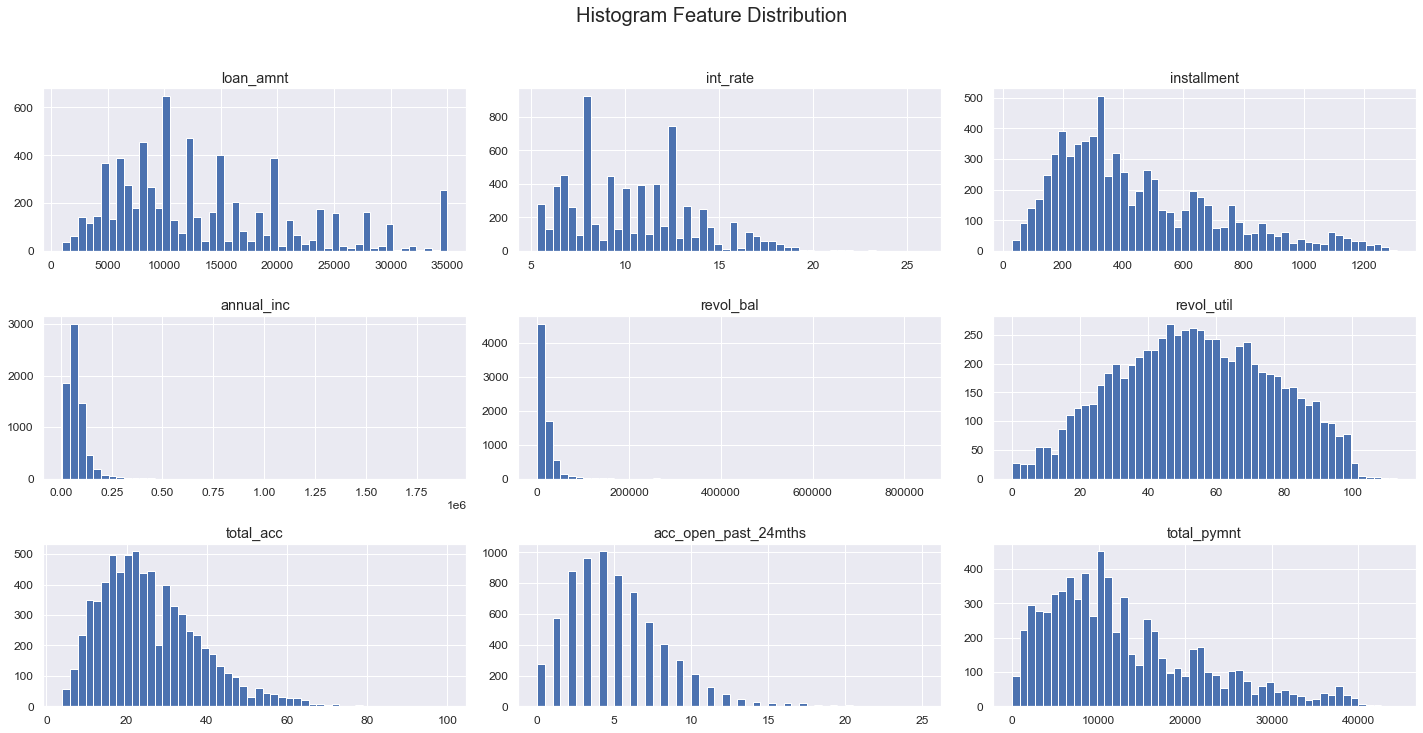

In [33]:
df.hist(bins=50, figsize=(20,10))
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

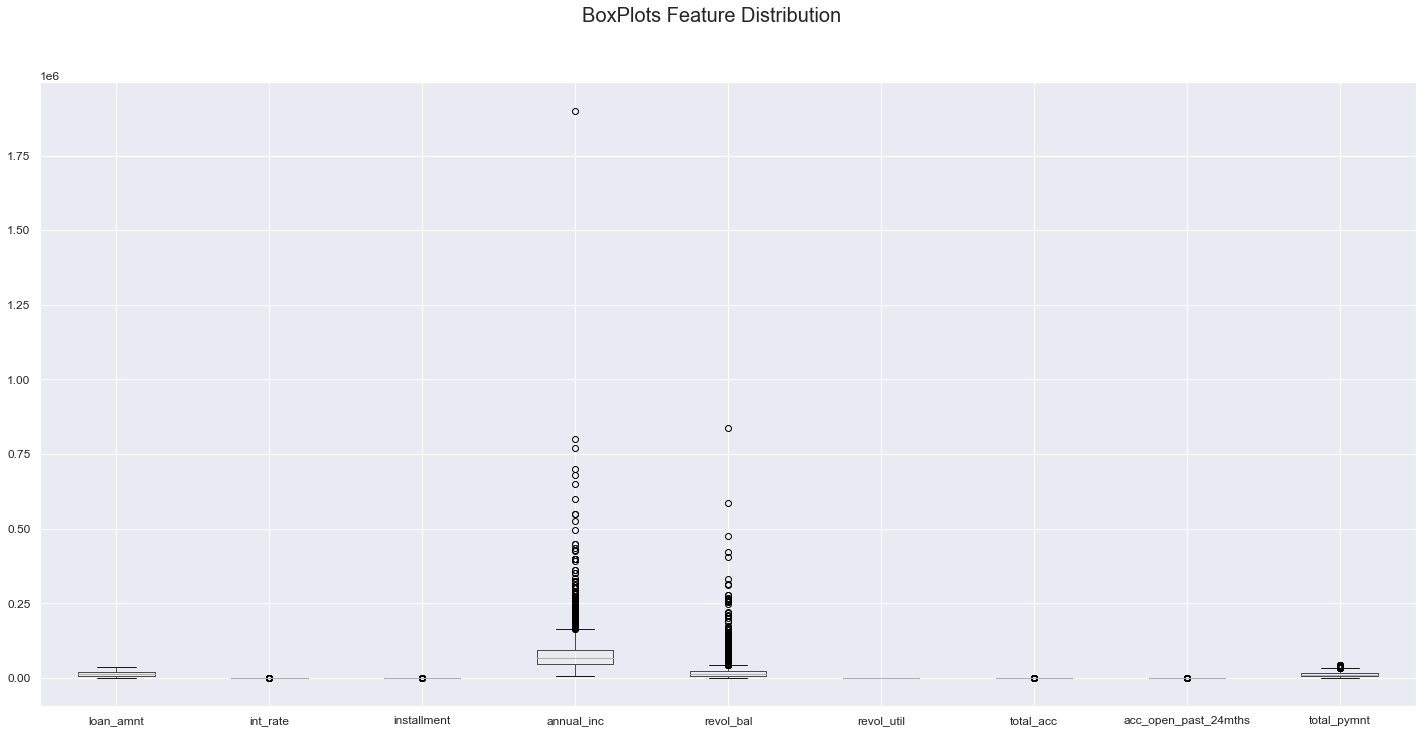

In [34]:
df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

Data visualization - part A. Create a plot to illustrate the distribution of interest rate (int_rate). Make sure to use a plot appropriate for illustrating distribution. 

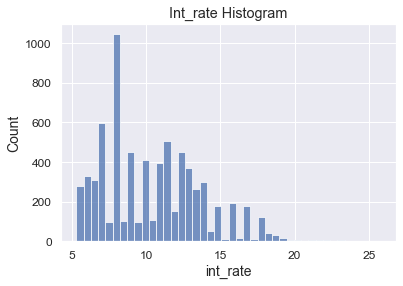

In [35]:
sns.histplot(data=df, x='int_rate')
plt.title("Int_rate Histogram")
plt.show()

Data visualization - Part B. What is the relationship between annual income and interest rate? Create a plot to illustrate this relationship. Make sure to use an appropriate type of plot. [Hint: You may need to remove outliers before creating the plot.] 

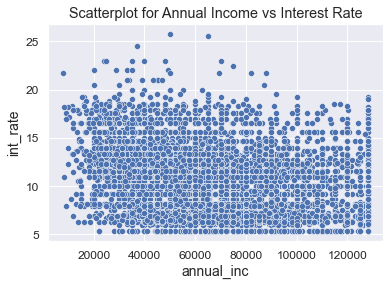

In [36]:
sns.scatterplot(x='annual_inc', y='int_rate', data=df2)
plt.title("Scatterplot for Annual Income vs Interest Rate")
plt.show()

In [37]:
df2.columns

Index(['loan_status', 'loan_amnt', 'int_rate', 'installment', 'annual_inc', 'revol_bal', 'revol_util', 'total_acc', 'acc_open_past_24mths', 'total_pymnt', 'loss'], dtype='object')

<Figure size 1440x1440 with 0 Axes>

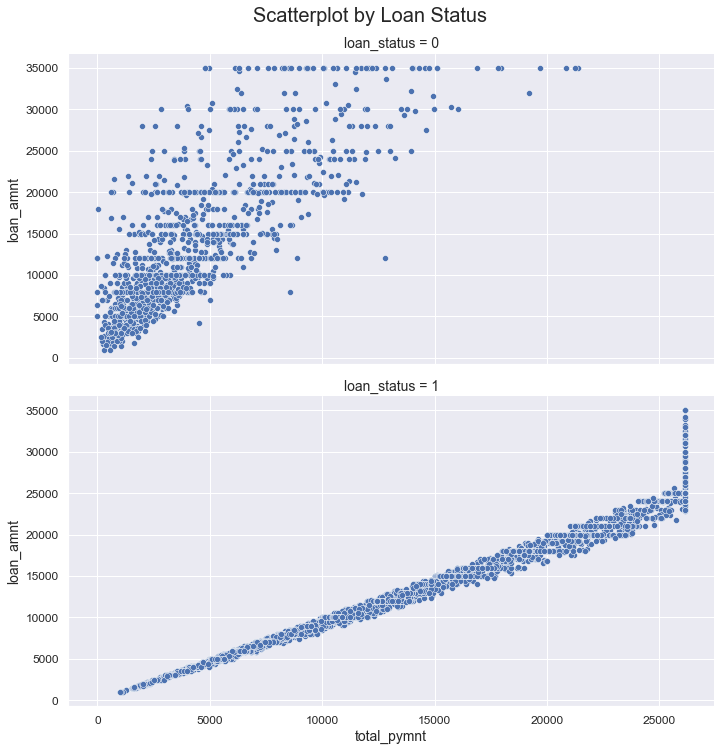

In [38]:
plt.figure(figsize=(20,20))



sns.relplot(x="total_pymnt", y="loan_amnt", 
            row="loan_status",
            data=df2, height = 5, aspect = 2)


plt.suptitle('Scatterplot by Loan Status', x=0.5, y=1.02, ha='center', fontsize=20)
plt.show()

## Perform predictive analytics tasks

In [39]:
df = pd.read_csv("loancleaned.csv")

In [40]:
df.head()

,loan_status,loan_amnt,int_rate,installment,annual_inc,revol_bal,revol_util,total_acc,acc_open_past_24mths,total_pymnt,loss
0,1,24000,7.89,750.86,128000.00,28279.00,36.90,25.00,5.00,24948.45,-948.45
1,1,8000,6.68,245.85,41000.00,24377.00,51.00,29.00,2.00,8351.63,-351.63
2,1,12175,9.17,388.13,100000.00,21329.00,64.60,17.00,3.00,13205.91,-1030.91
3,0,6400,6.92,197.38,41900.00,14936.00,73.20,15.00,1.00,3550.38,2849.62
4,1,12600,6.68,387.22,73800.00,9904.00,20.70,25.00,4.00,13125.77,-525.77


In [41]:
df.shape

(7148, 11)

Part 1. One of the important things for lenders is to be able to classify loans into good and bad loans. Classifying the loans into good and bad loans is a classification problem that can be done with several different tools we learned in this specialization, including logistic regression, classification trees, and neural networks.

Build a logistic regression model with loan_status as the dependent variable and all other variables except total_pymnt as explanatory variables. 

In [42]:
df.columns

Index(['loan_status', 'loan_amnt', 'int_rate', 'installment', 'annual_inc', 'revol_bal', 'revol_util', 'total_acc', 'acc_open_past_24mths', 'total_pymnt', 'loss'], dtype='object')

In [43]:
df2 = df[['loan_amnt', 'int_rate', 'installment', 'annual_inc', 
          'revol_bal', 'revol_util', 'total_acc', 'acc_open_past_24mths','loan_status']]

In [44]:
df2.head()

,loan_amnt,int_rate,installment,annual_inc,revol_bal,revol_util,total_acc,acc_open_past_24mths,loan_status
0,24000,7.89,750.86,128000.00,28279.00,36.90,25.00,5.00,1
1,8000,6.68,245.85,41000.00,24377.00,51.00,29.00,2.00,1
2,12175,9.17,388.13,100000.00,21329.00,64.60,17.00,3.00,1
3,6400,6.92,197.38,41900.00,14936.00,73.20,15.00,1.00,0
4,12600,6.68,387.22,73800.00,9904.00,20.70,25.00,4.00,1


### Train Test Split

In [45]:
df2.shape

(7148, 9)

In [46]:
X = df2.iloc[:,:8]
y = df2.iloc[:,8]

In [47]:
X.values, y.values

(array([[24000.  ,     7.89,   750.86, ...,    36.9 ,    25.  ,     5.  ],
        [ 8000.  ,     6.68,   245.85, ...,    51.  ,    29.  ,     2.  ],
        [12175.  ,     9.17,   388.13, ...,    64.6 ,    17.  ,     3.  ],
        ...,
        [13800.  ,     8.18,   433.59, ...,    55.8 ,    31.  ,     9.  ],
        [19175.  ,    17.14,   684.98, ...,    71.1 ,    24.  ,     6.  ],
        [ 4400.  ,    13.33,   148.96, ...,    30.  ,    16.  ,     9.  ]]),
 array([1, 1, 1, ..., 1, 1, 1], dtype=int64))

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [49]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4288, 8), (2860, 8), (4288,), (2860,))

## Feature Scaling

In [50]:
X_train

,loan_amnt,int_rate,installment,annual_inc,revol_bal,revol_util,total_acc,acc_open_past_24mths
1765,11000,12.05,365.63,40000.00,10477.00,61.30,10.00,0.00
6593,10400,10.99,340.44,45000.00,7060.00,27.60,21.00,9.00
3482,2000,11.44,65.90,45000.00,13822.00,85.00,29.00,2.00
913,15000,8.67,474.70,45000.00,11559.00,51.80,13.00,8.00
720,20000,6.99,617.46,85000.00,27271.00,49.80,17.00,2.00
...,...,...,...,...,...,...,...,...
4931,10000,8.18,314.20,44709.24,9645.00,78.40,6.00,0.00
3264,12000,8.19,377.09,90000.00,4361.00,53.20,19.00,5.00
1653,6200,7.89,193.98,109300.00,2791.00,17.40,29.00,4.00
2607,12600,6.24,384.69,72000.00,12834.00,44.40,23.00,6.00


In [51]:
minmax = MinMaxScaler()

In [52]:
X_train_scaled = minmax.fit_transform(X_train)

In [53]:
X_test_scaled = minmax.transform(X_test)

In [54]:
X_train_scaled

array([[0.29411765, 0.33234568, 0.41733307, ..., 0.72117647, 0.15384615,
        0.        ],
       [0.27647059, 0.28      , 0.38593149, ..., 0.32470588, 0.43589744,
        1.        ],
       [0.02941176, 0.30222222, 0.04369295, ..., 1.        , 0.64102564,
        0.22222222],
       ...,
       [0.15294118, 0.12691358, 0.20335607, ..., 0.20470588, 0.64102564,
        0.44444444],
       [0.34117647, 0.0454321 , 0.44109306, ..., 0.52235294, 0.48717949,
        0.66666667],
       [0.3       , 0.34419753, 0.42721852, ..., 0.84117647, 0.56410256,
        0.33333333]])

In [55]:
X_test_scaled

array([[0.01470588, 0.36395062, 0.02427109, ..., 0.38117647, 0.12820513,
        0.22222222],
       [0.26470588, 0.19012346, 0.35894284, ..., 0.31764706, 0.30769231,
        0.66666667],
       [0.17647059, 0.30666667, 0.24943   , ..., 0.41294118, 0.23076923,
        0.44444444],
       ...,
       [0.14926471, 0.63851852, 0.23627848, ..., 0.80235294, 0.23076923,
        0.55555556],
       [0.38235294, 0.28      , 0.53282955, ..., 0.51058824, 0.71794872,
        0.33333333],
       [0.15147059, 0.44395062, 0.2247226 , ..., 0.90117647, 0.53846154,
        0.44444444]])

### Model Training

### Using PyCaret

In [56]:
from pycaret.classification import *

In [57]:
exp_class = setup(data = df2, target = 'loan_status', session_id=0, normalize=True, train_size=0.6) 

,Description,Value
0,session_id,0
1,Target,loan_status
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(7148, 9)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [58]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [59]:
compare_models(exclude=['lightgbm','mlp','ada','ridge','svm'],fold=5, sort="AUC") #For Classifier

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8316,0.7046,0.9924,0.8360,0.9075,0.0408,0.0863,1.2140
lda,Linear Discriminant Analysis,0.8321,0.7045,0.9896,0.8380,0.9075,0.0618,0.1133,0.0140
gbc,Gradient Boosting Classifier,0.8279,0.6997,0.9837,0.8377,0.9049,0.0581,0.0963,0.2760
nb,Naive Bayes,0.8253,0.6988,0.9658,0.8461,0.9020,0.1305,0.1619,0.0120
qda,Quadratic Discriminant Analysis,0.8095,0.6863,0.9448,0.8447,0.8919,0.1083,0.1234,0.0200
rf,Random Forest Classifier,0.8258,0.6669,0.9815,0.8372,0.9036,0.0522,0.0834,0.3020
et,Extra Trees Classifier,0.8279,0.6645,0.9860,0.8365,0.9051,0.0450,0.0796,0.2440
xgboost,Extreme Gradient Boosting,0.8130,0.6555,0.9510,0.8441,0.8943,0.1055,0.1227,0.2700
knn,K Neighbors Classifier,0.8081,0.5908,0.9507,0.8399,0.8918,0.0687,0.0818,0.0560
dt,Decision Tree Classifier,0.7295,0.5454,0.8224,0.8479,0.8349,0.0867,0.0870,0.0260


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
classify_selected = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8298,0.7272,0.9944,0.8333,0.9068,0.0134,0.0372
1,0.8298,0.7036,0.9916,0.8349,0.9065,0.0308,0.0675
2,0.8275,0.7670,0.9944,0.8314,0.9056,-0.0092,-0.0307
3,0.8345,0.7054,0.9916,0.8389,0.9089,0.0737,0.1391
4,0.8345,0.7555,0.9972,0.8357,0.9093,0.0404,0.1120
5,0.8298,0.6606,0.9916,0.8349,0.9065,0.0308,0.0675
6,0.8368,0.6210,0.9972,0.8376,0.9105,0.0624,0.1511
7,0.8298,0.6771,0.9916,0.8349,0.9065,0.0308,0.0675
8,0.8364,0.6991,0.9916,0.8409,0.9100,0.0750,0.1406
9,0.8248,0.7303,0.9860,0.8337,0.9035,0.0215,0.0405


In [61]:
print(classify_selected)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [62]:
tuned_classify = tune_model(classify_selected, optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8298,0.7270,0.9944,0.8333,0.9068,0.0134,0.0372
1,0.8298,0.7037,0.9916,0.8349,0.9065,0.0308,0.0675
2,0.8275,0.7668,0.9944,0.8314,0.9056,-0.0092,-0.0307
3,0.8345,0.7052,0.9916,0.8389,0.9089,0.0737,0.1391
4,0.8345,0.7555,0.9972,0.8357,0.9093,0.0404,0.1120
5,0.8298,0.6604,0.9916,0.8349,0.9065,0.0308,0.0675
6,0.8368,0.6212,0.9972,0.8376,0.9105,0.0624,0.1511
7,0.8322,0.6771,0.9916,0.8369,0.9077,0.0525,0.1059
8,0.8364,0.6990,0.9916,0.8409,0.9100,0.0750,0.1406
9,0.8248,0.7301,0.9860,0.8337,0.9035,0.0215,0.0405


***

## Using Regression or Classification Models

In [63]:
lr_model = LogisticRegression(random_state=0)

In [64]:
lr_model.fit(X_train_scaled,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
lr_pred =lr_model.predict(X_test_scaled)

In [66]:
lr_pred

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

### Model Evaluation

In [67]:
cm = confusion_matrix(y_test,lr_pred)
cm

array([[  15,  473],
       [   7, 2365]], dtype=int64)

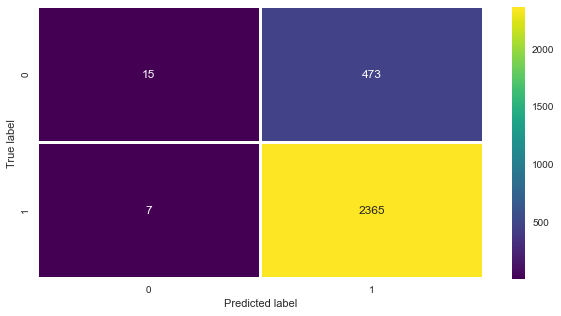

In [68]:
fig , ax = plt.subplots(figsize=(10,5))
sns.heatmap(cm, annot=True,fmt='.4g',linewidths=2, cmap='viridis')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [69]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.68      0.03      0.06       488
           1       0.83      1.00      0.91      2372

    accuracy                           0.83      2860
   macro avg       0.76      0.51      0.48      2860
weighted avg       0.81      0.83      0.76      2860



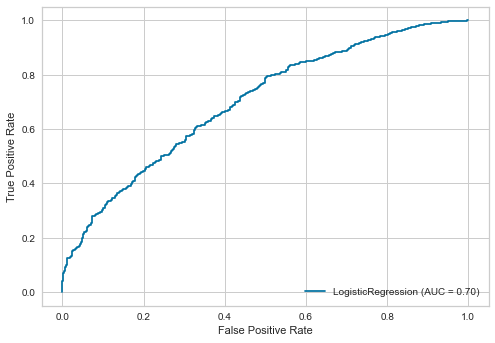

In [70]:
plot_roc_curve(lr_model,X_test_scaled,y_test)
plt.show()

Build a classification tree model using the training data.

In [71]:
tree_model = DecisionTreeClassifier(random_state=0)

In [72]:
tree_model.fit(X_train_scaled,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [73]:
tree_pred = tree_model.predict(X_test_scaled)

In [74]:
tree_pred

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

### Model Evaluation

In [75]:
cm = confusion_matrix(y_test,tree_pred)
cm

array([[ 126,  362],
       [ 429, 1943]], dtype=int64)

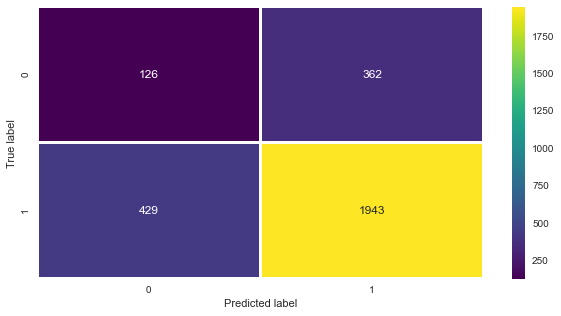

In [76]:
fig , ax = plt.subplots(figsize=(10,5))
sns.heatmap(cm, annot=True,fmt='.4g',linewidths=2, cmap='viridis')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [77]:
print(classification_report(y_test,tree_pred))

              precision    recall  f1-score   support

           0       0.23      0.26      0.24       488
           1       0.84      0.82      0.83      2372

    accuracy                           0.72      2860
   macro avg       0.53      0.54      0.54      2860
weighted avg       0.74      0.72      0.73      2860



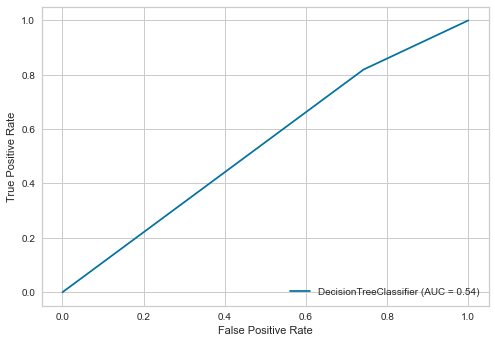

In [78]:
plot_roc_curve(tree_model,X_test_scaled,y_test)
plt.show()

In [79]:
tree_model.feature_importances_

array([0.05694713, 0.15835388, 0.08698303, 0.1383298 , 0.17797743,
       0.17382195, 0.13278652, 0.07480025])

In [80]:
X.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'revol_bal', 'revol_util', 'total_acc', 'acc_open_past_24mths'], dtype='object')

In [81]:
nn_model = MLPClassifier(random_state=0)

In [82]:
nn_model.fit(X_train_scaled,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [83]:
nn_pred =nn_model.predict(X_test_scaled)

In [84]:
nn_pred

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

### Model Evaluation

In [85]:
cm = confusion_matrix(y_test,nn_pred)
cm

array([[  13,  475],
       [  10, 2362]], dtype=int64)

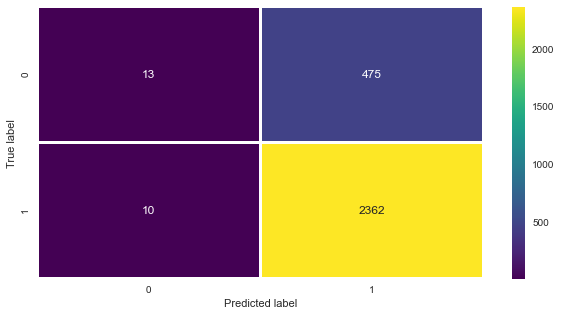

In [86]:
fig , ax = plt.subplots(figsize=(10,5))
sns.heatmap(cm, annot=True,fmt='.4g',linewidths=2, cmap='viridis')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [87]:
print(classification_report(y_test,nn_pred))

              precision    recall  f1-score   support

           0       0.57      0.03      0.05       488
           1       0.83      1.00      0.91      2372

    accuracy                           0.83      2860
   macro avg       0.70      0.51      0.48      2860
weighted avg       0.79      0.83      0.76      2860



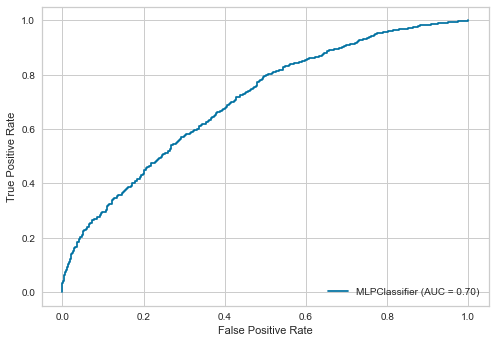

In [88]:
plot_roc_curve(nn_model,X_test_scaled,y_test)
plt.show()

Part 2. Lenders would also like to predict the amount of losses. Even if a loan is bad, they can recover some of the money they lent. For this part of the project, you should only consider loans that have loan_status Charged Off. Create a new column called loss, which is the difference between loan_amnt and total_pymnt. Split the dataset into training and validation sets using a 60:40 split. 

In [89]:
df = pd.read_csv("loancleaned.csv")

In [90]:
df.head()

,loan_status,loan_amnt,int_rate,installment,annual_inc,revol_bal,revol_util,total_acc,acc_open_past_24mths,total_pymnt,loss
0,1,24000,7.89,750.86,128000.00,28279.00,36.90,25.00,5.00,24948.45,-948.45
1,1,8000,6.68,245.85,41000.00,24377.00,51.00,29.00,2.00,8351.63,-351.63
2,1,12175,9.17,388.13,100000.00,21329.00,64.60,17.00,3.00,13205.91,-1030.91
3,0,6400,6.92,197.38,41900.00,14936.00,73.20,15.00,1.00,3550.38,2849.62
4,1,12600,6.68,387.22,73800.00,9904.00,20.70,25.00,4.00,13125.77,-525.77


In [91]:
df.shape

(7148, 11)

In [92]:
df.columns

Index(['loan_status', 'loan_amnt', 'int_rate', 'installment', 'annual_inc', 'revol_bal', 'revol_util', 'total_acc', 'acc_open_past_24mths', 'total_pymnt', 'loss'], dtype='object')

Build a linear regression model with loss as the dependent variable and all other variables except loan_amnt, total_pymnt, and loan_status as explanatory variables. Report adjusted R-squared and RMS Error on the validation data.

In [93]:
df2 = df[['int_rate', 'installment', 'annual_inc', 
          'revol_bal', 'revol_util', 'total_acc', 'acc_open_past_24mths','loss']]

In [94]:
df2.head()

,int_rate,installment,annual_inc,revol_bal,revol_util,total_acc,acc_open_past_24mths,loss
0,7.89,750.86,128000.00,28279.00,36.90,25.00,5.00,-948.45
1,6.68,245.85,41000.00,24377.00,51.00,29.00,2.00,-351.63
2,9.17,388.13,100000.00,21329.00,64.60,17.00,3.00,-1030.91
3,6.92,197.38,41900.00,14936.00,73.20,15.00,1.00,2849.62
4,6.68,387.22,73800.00,9904.00,20.70,25.00,4.00,-525.77


### Train Test Split

In [95]:
df2.shape

(7148, 8)

In [96]:
X = df2.iloc[:,:7]
y = df2.iloc[:,7]

In [97]:
X.values, y.values

(array([[     7.89,    750.86, 128000.  , ...,     36.9 ,     25.  ,
              5.  ],
        [     6.68,    245.85,  41000.  , ...,     51.  ,     29.  ,
              2.  ],
        [     9.17,    388.13, 100000.  , ...,     64.6 ,     17.  ,
              3.  ],
        ...,
        [     8.18,    433.59,  94000.  , ...,     55.8 ,     31.  ,
              9.  ],
        [    17.14,    684.98,  80000.  , ...,     71.1 ,     24.  ,
              6.  ],
        [    13.33,    148.96,  42000.  , ...,     30.  ,     16.  ,
              9.  ]]),
 array([ -948.45   ,  -351.63   , -1030.91   , ...,  -387.90993,
        -3022.23   ,  -531.39   ]))

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [99]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4288, 7), (2860, 7), (4288,), (2860,))

## Feature Scaling

In [100]:
X_train

,int_rate,installment,annual_inc,revol_bal,revol_util,total_acc,acc_open_past_24mths
1765,12.05,365.63,40000.00,10477.00,61.30,10.00,0.00
6593,10.99,340.44,45000.00,7060.00,27.60,21.00,9.00
3482,11.44,65.90,45000.00,13822.00,85.00,29.00,2.00
913,8.67,474.70,45000.00,11559.00,51.80,13.00,8.00
720,6.99,617.46,85000.00,27271.00,49.80,17.00,2.00
...,...,...,...,...,...,...,...
4931,8.18,314.20,44709.24,9645.00,78.40,6.00,0.00
3264,8.19,377.09,90000.00,4361.00,53.20,19.00,5.00
1653,7.89,193.98,109300.00,2791.00,17.40,29.00,4.00
2607,6.24,384.69,72000.00,12834.00,44.40,23.00,6.00


In [101]:
scaler = StandardScaler()

In [102]:
X_train_scaled = scaler.fit_transform(X_train)

In [103]:
X_test_scaled = scaler.transform(X_test)

In [104]:
X_train_scaled

array([[ 0.50377436, -0.25484203, -0.9702612 , ...,  0.392761  ,
        -1.43611301, -1.76980581],
       [ 0.18387669, -0.36636399, -0.81123922, ..., -1.16744298,
        -0.39787841,  1.64333425],
       [ 0.31968231, -1.58181608, -0.81123922, ...,  1.48999645,
         0.3572013 , -1.01133024],
       ...,
       [-0.7516731 , -1.01477629,  1.23378344, ..., -1.6396709 ,
         0.3572013 , -0.25285467],
       [-1.24962702, -0.170459  ,  0.04747947, ..., -0.38965583,
        -0.20910848,  0.5056209 ],
       [ 0.57620402, -0.21973409, -1.28830516, ...,  0.86498892,
         0.07404641, -0.63209245]])

In [105]:
X_test_scaled

array([[ 0.69692013, -1.65079234, -1.17190107, ..., -0.94521808,
        -1.53049797, -1.01133024],
       [-0.36538157, -0.46221355, -1.55927862, ..., -1.1952211 ,
        -0.86980323,  0.5056209 ],
       [ 0.34684343, -0.85114582, -0.87484802, ..., -0.82021658,
        -1.15295812, -0.25285467],
       ...,
       [ 2.37487394, -0.89785311, -1.73356671, ...,  0.7122093 ,
        -1.15295812,  0.12638311],
       [ 0.18387669,  0.15534095, -0.01612932, ..., -0.43595269,
         0.6403562 , -0.63209245],
       [ 1.18582034, -0.93889354, -0.33417328, ...,  1.10110287,
        -0.02033855, -0.25285467]])

In [106]:
lr_model = LinearRegression()

In [107]:
lr_model.fit(X_train_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [108]:
lr_pred = lr_model.predict(X_test_scaled)

In [109]:
lr_pred

array([-561.76473589, 1675.18658715,  361.45763664, ..., 2259.40168303,
       1319.13062117,  421.44423646])

### Model Evaluation

In [110]:
mse = mean_squared_error(y_test,lr_pred)
mse

19037490.926135823

In [111]:
rmse = np.sqrt(mse)
rmse

4363.197328351747

In [112]:
r2score = r2_score(y_test,lr_pred)
r2score

0.15423497566691768

In [113]:
cross_val_score(lr_model,X_test_scaled,y_test)

array([0.14225295, 0.19939092, 0.09168168, 0.12270643, 0.18287314])

In [114]:
lr_model.score(X_train_scaled,y_train)

0.1435358691292421

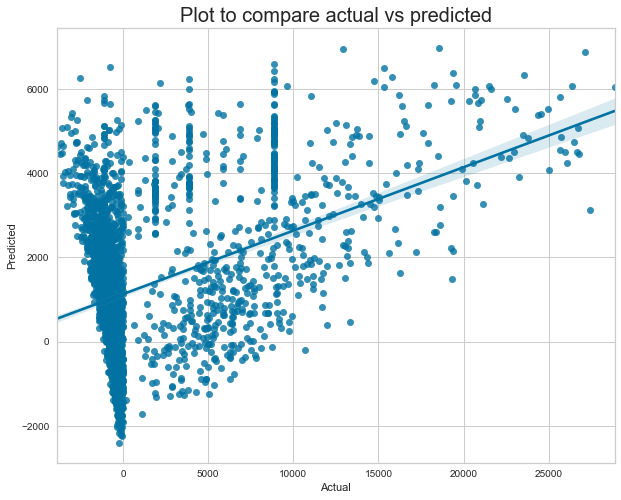

In [115]:
fig, ax = plt.subplots(figsize=(10,8))
sns.regplot(x=y_test, y=lr_pred, ax=ax)
plt.title("Plot to compare actual vs predicted", fontsize=20)
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.show()

#### Python code done by Dennis Lam